In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Funcions útils

In [3]:
def imprimeix_imatge(image):
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='Greys')
    plt.axis('off')
    plt.show()

def sigmoide(x):
    return 1/(1 + np.exp(-x))

def softmax(x):
    exp = np.exp(x - np.max(x))
    return exp / exp.sum(axis=0)

# derivada de relu
def d_sigmoide(x):
    return sigmoide(x) * (1-sigmoide(x))

### LLegir dades i processar-les

In [4]:
entrenament = pd.read_csv("train.csv").to_numpy()
prova = pd.read_csv("test.csv").to_numpy()
np.random.shuffle(entrenament)
entrenament

array([[1, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

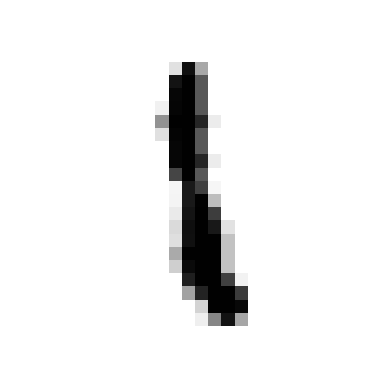

1

In [5]:
def processa_imatges(imatges):
    imatges = (imatges-np.min(imatges))/(np.max(imatges)-np.min(imatges))
    imatges = imatges.T
    return imatges

entrenament_digits = entrenament[:, 0]
entrenament_imatges = processa_imatges(entrenament[:, 1:])
prova_imatges = processa_imatges(prova)
imprimeix_imatge(entrenament_imatges.T[0])
entrenament_digits[0]

In [6]:
w1 = np.random.randn(16, 28*28)
w2 = np.random.randn(10, 16)
b1 = np.random.randn(16, 1)
b2 = np.random.randn(10, 1)

In [7]:
def propaga(imatges):
    z1 = w1.dot(imatges) + b1
    a1 = sigmoide(z1)
    z2 = w2.dot(a1) + b2
    a2 = softmax(z2)
    return z1, a1, z2, a2

In [8]:
propaga(entrenament_imatges)[3]

array([[3.89301717e-03, 1.16148110e-04, 9.31927618e-03, ...,
        4.82135774e-03, 7.40398438e-03, 7.83515426e-04],
       [1.23007261e-03, 6.16264642e-04, 7.64172009e-04, ...,
        2.31250369e-03, 1.62727112e-02, 5.08803374e-04],
       [2.15444315e-04, 4.28488025e-04, 1.24964271e-04, ...,
        1.22126149e-05, 1.22154688e-02, 7.31139071e-05],
       ...,
       [3.13190589e-03, 2.98628998e-04, 1.76844543e-03, ...,
        3.79441031e-02, 2.96713309e-03, 1.64611509e-04],
       [2.33988954e-01, 5.97251055e-01, 4.84003207e-01, ...,
        1.84305452e-01, 4.92399265e-01, 6.27295359e-02],
       [6.92924574e-01, 3.05759458e-01, 2.46905467e-01, ...,
        5.94209158e-01, 2.40766845e-01, 2.33518009e-01]])

In [9]:
def one_hot(digits):
    one_hot_digits = np.zeros((digits.shape[0], 10))
    for (digit, one_hot_vec) in zip(digits, one_hot_digits):
        one_hot_vec[digit] = 1
    return one_hot_digits.T

In [10]:
def retropropaga(z1, a1, z2, a2, digits, imatges):
    tamany, m = imatges.shape
    dz2 = 2*(a2 - one_hot(digits))
    dw2 = 1/m * (dz2.dot(a1.T))
    db2 = 1/m * (np.sum(dz2, 1))
    dz1 = w2.T.dot(dz2)*d_sigmoide(z1)
    dw1 = 1/m * (dz1.dot(imatges.T))
    db1 = 1/m * np.sum(dz1,1)

    return dw1, db1, dw2, db2

In [11]:
precisió = 0
alfa = 0.15
iter = 0
while alfa < 0.9:
    iter += 1

    z1, a1, z2, a2 = propaga(entrenament_imatges)
    dw1, db1, dw2, db2 = retropropaga(z1, a1, z2, a2, entrenament_digits, entrenament_imatges)

    w1 -= alfa * dw1
    b1 -= alfa * np.reshape(db1, (16,1))
    w2 -= alfa * dw2
    b2 -= alfa * np.reshape(db2, (10, 1))

    precisió = np.sum(np.argmax(a2, 0) == entrenament_digits)/entrenament_digits.size
    if (iter % 10 == 0):
        print(f"Iteració: {iter}, precisió: {precisió*100:.2f}%", end="\r")

KeyboardInterrupt: 

In [1]:
_, _, _, a2 = propaga(prova_imatges)
imprimeix_imatge(prova_imatges.T[8])
print(np.argmax(a2, 0)[8])

NameError: name 'propaga' is not defined